In [1]:
pwd

'/home/jose/Desktop/GitHub/Aerosol_particle_charging_1d_model/Examples'

In [2]:
from linker import *
%matplotlib notebook
tqdm.pandas()

# 1-dimensional simulations of ESP particle dynamics

In this script we solve the general dynamics equation to derive the bidimensional particle size distribution of particles having passed through the ESP. This distribution is noted as $n_z=n(D_p,z)$ where $n_z$ is the particle number concentration of particles with diameter $D_p$ and charge $z$. We assume that particles get unipolar charged in an electrostatic precipitator (ESP). To this end, the following assumptions are made,

* Only ions with a single number of charges and unipolar.
* We work with the average velocity profile $U$ in the ESP so the problem is 1-dimensional.
* The electric field $E$ is uniform everywhere in the ESP.
* Particles get collected on the ESP grounded plates at velocity $V=Z_pE$ due to this electric field according to their electrical mobility $Z_p$ and the electric field $E$.
* The number concentration of ions $n_{i}$ is uniform along the ESP.

## One-dimensional model description

The figure below shows a volume element of width $dx$ of the ESP. In this figure, the so called high voltage plate is actually the array of high voltage wires modeled as a plate here. At the bottom of the image the grounded plate corresponding to the particle collection mesh in the ESP is shown.

As observed in the figure, the high voltage plate will produce ions (red dots) due to a corona discharge. These ions will move towards the grounded plate due to the electric field created between the 2 plates. At the same time that these ions are moving downwards, they collide with particles and therefore transfer their charge to them. The aerosol particles moving in the direction $+x$ at an average velocity $u=dx/dt$ may be collected on the bottom plate according to their electrical mobility $Z_p$. Other particles will exit this volume element at the interface located at $x+\Delta x$.

![model_1d](https://user-images.githubusercontent.com/62391931/229414629-e120c1b8-9bfe-4ec6-8656-5deb0bda6ed0.png)
*Figure: This figure shows particles (black dots) moving from lest to right and colliding with ions (red dots) in an elementary section of thickness $\Delta x$ in an electrostatic precipitator (ESP). The ESP consists of a high voltage and a grounded plate where a corona dicharge takes place and also an electric field exist. As this charging process is stochastic, some charged particles with high electrical mobility will be collected on the grounded plates and some of them will exit the section of the ESP.*


## Charging mechanisms

Particles in the ESP can be charged through 2 different mechanisms, namely (a) diffusion and (2) field charging. The former is due to particle-ion collisions where ions experience Brownian motion due to their thermal energy. The field charging is due to ions displacement following the electric field lines to ultimately collide with particles. This means that field charging will exist when the particle is able to conduct electricity and therefore form continuous electric field lines with the surrounding medium.

### 1. Diffusion charging

The total number of collisions between a particle with charge $z$ and an ion can be determined as,
$$R_z=\beta_zn_in_z$$
where $\beta_z$ is the collision kernel (m$^3/$s), $n_i$ and $n_z=n(z,t)$ are the ion and particle with charge $z$ number concentration (1/m$^3$), respectively.

The characteristic time of diffusion charging is,
$$\tau_{dc} = \frac{1}{\beta_zn_i}$$

![Diffusion_charging](https://user-images.githubusercontent.com/62391931/229414330-b5e6babf-1dbe-4b32-aa24-8bc6c8b81891.png)
*Figure: This figure shows a particle (gray sphere in the center) colliding with ions (red dots) moving with diffusive trajectories.*

### 2. Field charging
Field charging is modeled here as proposed by [Kim and Yoon (1997)](https://www.sciencedirect.com/science/article/pii/S0021979796946287) but neglecting the variation of the electric field within the particle. In their model, the flux of ions is integrated on the surface of a initially neutral spherical particle. In this context, the rate change $I_z$ of the number of elementary charges $z$ for a spherical particle of radius $R_p$ and dielectric constant $\epsilon_p$, in a medium with ions having an electrical mobility $Z_i$ and number concentration $n_i$ is given by,

$$I_z=\frac{dz}{dt} = \frac{n_iZ_iez_s}{4\epsilon_0}\left(1-\frac{z}{z_s}\right)^2$$

where $z_s$ is the saturation charge limit,
$$z_s=\frac{4\pi\epsilon_0}{e}R_p^2E\left(\frac{3\epsilon_p}{\epsilon_p+2}\right)$$
where $E$ is the constant electric field strength.

The characteristic time of field charging is,
$$\tau_{fc} = \frac{4\epsilon_0}{n_iZ_ie}$$

![Field_charging](https://user-images.githubusercontent.com/62391931/229414424-6ff81827-ecd1-4982-b99e-3de6084f61c0.png)
*Figure: This figure shows a particle (gray sphere in the center) colliding with ions (red dots) moving with following the electric field lines (continuous lines).*

Reference for field charging: J. Colloid Int. Sci. 186, 209–211 (1997)

## Mass balance
Now, we may simply conduct a mass balance on the selected ESP volume element considering a steady-state condition as,
$$-Aun_z(x)+Aun_z(x+\Delta x)+h_zw\Delta x+(n_{z-1}n_i\beta_{z-1}-n_{z}n_i\beta_{z})A\Delta t +\frac{\partial}{\partial z}(I_zn_z)A\Delta t= 0$$
where,
* $A$: Cross section of the ESP (perpendicular to the axis $x$)
* $n_z(x)$: Number concentration of particles of diameter $D_p$ and charge number $z$ at the interface $x$
* $n_i$: Number concentration of ions
* $h_z$: Electrostatic particles collection flux. This flux can be approximated as: $h_z=n_zv$
* $w$: Width of the ESP (dimension in the direction perpendicular to the plane depicted in the figure above)
* $\beta_z$: Total collision frequency between particles of diameter $D_p$ and charge number $z$ with the surrounding ions
* $\Delta t$: time taken to particles to traverse the volume element $\Delta x$. This time step can be directly expressed as $\Delta t=\Delta x/u$

Replacing on the mass balance equation and taking the limit $\Delta x\rightarrow 0$ the following differential equation is obtained,
$$\frac{dn_z}{dx}=-(n_zv)\frac{w}{Au}+\frac{1}{u}n_i(n_{z-1}\beta_{z-1}-n_{z}\beta_{z})-\frac{1}{u}\frac{\partial}{\partial z}(I_zn_z)$$

Considering the corss-section area as $A=wb$ where $w$ and $b$ are the width amd heoght of the ESP cross section,
$$\frac{dn_z}{dx}=-(n_z)\frac{v}{bu}+\frac{1}{u}n_i(n_{z-1}\beta_{z-1}-n_{z}\beta_{z})-\frac{1}{u}\frac{\partial}{\partial z}(I_zn_z)$$

Now, considering the length of the ESP $L$ we can determine the particle number concentration at the exit as,
$$n_z(L)=\int_{0}^{L}\frac{dn_z}{dx}dx$$

## Computational implementation

### 1. Discretization of the differential equation
Although the problem makes sense to be expressed in the spatial coordinate $x$, it is simpler more familiar and simpler to express the problem in coordinate of time considering $dx=u dt$,
$$\frac{dn_z}{dt}=-\frac{n_zv}{b}+n_i(n_{z-1}\beta_{z-1}-n_{z}\beta_{z})-\frac{\partial}{\partial z}(I_zn_z)$$

Considering $\Delta t\ll \tau_{fc}$ then we can approximate the las term of this equation as,
$$\frac{\partial}{\partial z}(I_zn_z)=I_zn_z-I_{z-1}n_{z-1}$$

It can be simply discretized based on a forward Euler approach as,
$$n_z(t+\Delta t)=n_z(t)\left(1-\Delta t\left[\frac{v}{b}+n_i\beta_{z}\right]\right)+\Delta tn_in_{z-1}\beta_{z-1}-(I_zn_z-I_{z-1}n_{z-1})\Delta t $$

This equation can be solved with a nodal approach considering a discretization of the number of charges $z\in [1,z_{max}]$ and the discretization of particle sizes $D_p\in[D_{min},D_{max}]$. Other inputs of the model are,

* The initial particle number concentration $n_z(0)=n_0$
* The electric field $E=V/b$ where $V$ is the voltage between the two plates, to determine the particle electrophoretic deposition velocity as $v=Z_pE$, where $Z_p$ is the particle electrical mobility calculated as,
$$Z_p=\frac{ze}{f}$$
* The dimensions of the ESP $b$ and $w$


The particle friction coefficient (assuming Stokes regime) is determined as,

$$f= \frac{6\pi \mu R_{p}}{C_c}$$ 

In this expression, $\mu$ is the fluid viscosity dependent on its temperature and pressure, and 

$$C_c(\mathrm{Kn}_g) = 1+\mathrm{Kn}_g(1.257+0.4\exp[-1.1/\mathrm{Kn}_g])$$ 

is the Cunningham slip correction factor, Kn$_g=\lambda_g/R_{p}$ is the classical gas Knudsen number consisting on the ratio between the gas mean free path $\lambda_g$ and the particles' radius $R_{p}$.


Input parameter for ESP collection simulations.

| Parameter | Description | Units | Value |
| --- | --- | --- | --- |
| $b$ | ESP height  | cm | 6.7 |
| $L$ | ESP length | cm | 122 |
| $w$ | ESP width | cm | 40 |
| $Q_a$ | Aerosol flow | cfm | 20 |
| $V$ ($I$) | Corona voltage (current)| V ($\mu$A) | 14 (92) |
| $\epsilon_p$ | KCl dielectric constant | - | 4.81 |
| $Z_i$ | +Air ion mobility | cm$^2$/V/s | 1.70 |
| $m_i$ | +Air ion mass | Da | 129.48 |

Dalton units:
$$1\,Da = 1.660 \times 10^{−27}\, kg$$

- Reference for KCl dielectric constant: https://cdnsciencepub.com/doi/10.1139/p66-179
- The ion mass and mobility from: [Maißer et al.(2015)](https://www.sciencedirect.com/science/article/pii/S0021850215001305)

Based on these input parameters we estimate,

* The electric field $E$,
$$E = \frac{V}{b} = \frac{14\, kV}{6.7\,cm}=2.08\,kV/cm$$
* The ion number concentration $n_i$,
$$n_i = \frac{I}{2eZ_iEA_{plate}} =\frac{(92\cdot 10^{-6} A)}{2(1.6\cdot 10^{-19}\,C)(1.70\,cm^2/V/s)(2.08\,kV/cm)((40\,cm)(122\,cm))}=1.65\cdot 10^{13}\,1/m^3$$
* The ESP cross section area $A$,
$$A=wb=(40\,cm)(6.7\,cm)=268\,cm^2$$
* The aerosol particle velocity $u$,
$$u=\frac{Q_a}{A}=\frac{20\, cfm}{268\,cm^2}=35.21\, cm/s$$
* Residence time of particles in the ESP,
$$t_{res}=\frac{L}{u}=\frac{122\,cm}{35.21\,cm/s}=3.46\,s$$

### 2. Collision frequency model

The total number of collisions between a particle with charge $z$ and an ion can be determined as,
$$R_z=\beta_zn_in_z$$
where $\beta_z$ is the collision kernel. 

#### 2.1. Diffusive regime

In the diffusive regime (Kn$_D\rightarrow 0$) this kernel is,
$$\beta_z^c=4\pi \frac{k_BT}{f_{ip}}(a_i+R_p)\eta_c\approx 4\pi \frac{k_BT}{f_i}R_p\eta_c,\hspace{1cm}Kn_D\rightarrow 0$$
where $f_{ip}$ is the reduced friction foefficient $f_{ip}=f_if_p/(f_i+f_p)$ depending on the ion $f_i$ and particle's friction coefficient $f_p$. Also, $a_i$ and $R_p$ are the ion and particle collision radii, respectively. The factor $\eta_c$ is the continuum regime collision enhancement first derived by Fuchs as,
$$\eta_c = \left[\int_{1}^{\infty}\exp\left(\frac{\Phi(r^*)}{k_BT}\right)r^{*2}dr^*\right]^{-1}$$
where $r^*=r/(a_i+R_p)$ and $\Phi(r^*)$ being the ion image potential determined as,
$$\frac{\Phi(r^*)}{k_BT}=-\frac{\Psi_l}{2r^{*2}(r^{*2}-1)}$$
where the dimensionless image potential is given by,
$$ \Psi_l = \left(\frac{\epsilon_p-1}{\epsilon_p-2}\right)\frac{(z_ie)^2}{4\pi \epsilon_0k_BTR_p}$$

where $\epsilon_p$ is the particle dielectric constant, $e$ is the unit electron charge, and $\epsilon_0$ the oermitivity of free space. Also, in this equation $z_i$ is the number of elementary charges of the ion.



In addition, the Coulomb potential is determined as,
$$\frac{\Phi(r^*)}{k_BT}=-\frac{\Psi_c}{r^{*}}$$
where the dimensionless Coulomb potential is given by,
$$ \Psi_c = -\frac{z_iz_p e^2}{4\pi \epsilon_0k_BTR_p}$$

#### 2.2. Ballistic regime

In the ballistic regime (Kn$_D\rightarrow \infty$), the collision kernel is,
$$\beta_z^{FM}=\sqrt{\frac{8\pi k_BT}{m_{ip}}}(a_i+R_p)^2\eta_{FM},\hspace{1cm}Kn_D\rightarrow \infty$$
where $m_{ip}=m_im_p/(m_i+m_p)$ is the reduced mass depending on the ion mass $m_i$ and the particle's mass $m_p$. Also, the factor $\eta_{FM}$ accounts for the free molecular collision enhancement,

$$\eta_{FM} = 2\int_0^{\infty}\exp(-v^2)v^3b_{crit}^2(v)\,dv$$
where $b_{crit}(v)$ is the velocity-dependent critical impact parameter proposed by Ouyang et al., 2012 which is normalized by $(a_i+R_p)$ and depends on the dimensionless speed normalized by $\sqrt{2k_BT/m_{ip}}$.

In instances where collision does not occur, there exists a (dimensionless) distance of closest approach for these two entities, $r_{min}$ . By conservation of energy and angular momentum, the following relationship defines $r_{min}$,
$$b=r_{min}\sqrt{1+\frac{\Phi(r_{min}^*)}{k_BTv^2}}$$

where,
* $r_{min}^*>1$: considering the values of $b$, $k_BT$, $\Phi(r_{min}^*)$, and $v$ then collision does not happen.
* $r_{min}^*<1$ or a real $r_{min}^*$ cannot be found: then collision must happen. 

Therefore, $b_{crit}$ is determined as the smallest value at which $r_{min}^*>1$.

#### 2.3. Transition regime

In the transition regime, the collision kernel $\beta$ can be expressed as (Ouyang et al., 2012),
$$ \beta(Kn_D) = \frac{f_{ip}(a_i+R_p)^3\eta_{FM}^2H (Kn_D)}{ m_{ip}\eta_c}$$

where the diffusive Knudsen number is determined as 
$$Kn_D = \frac{\sqrt{k_BTm_{ip}}\eta_c}{f_{ip}(a_i+R_p)\eta_{FM}}$$

Combining the 2 previous equations we obtain,
$$ \beta(Kn_D) = (a_i+R_p)k_BT/f_{ip}\eta_c\frac{H (Kn_D)}{Kn_D^2} = \beta_z^c\frac{H (Kn_D)}{4\pi Kn_D^2} $$
$$ \beta(Kn_D) =\beta_z^c g(Kn_D)$$

And the dimensionless collision kernel is,
$$g (Kn_D) =\frac{H (Kn_D)}{4\pi Kn_D^2}=\frac{1+c_1Kn_D/(4\pi)+(c_2/\sqrt{2\pi})Kn_D^2}{1+c_3Kn_D+c_4Kn_D^2+c_2Kn_D^3}$$

where the parameters in these equation are ([Gopalakrishnan and Hogan, 2011](https://www.tandfonline.com/doi/full/10.1080/02786826.2011.601775)),

| Parameter | Value |
| --- | --- |
| $c_1$ | 25.836 |
| $c_2$ | 11.211 |
| $c_3$ | 3.502 |
| $c_4$ | 7.211 |

## Define input parameters

In [3]:
# Particle radius (m)
Rp = np.array([124.5e-09])
print("Particle radius: ",Rp * 1e+09, " nm")

Particle radius:  [124.5]  nm


In [4]:
# This model is simplified and a correction factor is needed for the ion
# number concentration (n_i_corr) and electric field (factor_E)
n_i_corr = 30
factor_E = 1.8

In [5]:
with_fc = True  # True will include field charging in the model
with_dc = True  # True will include diffusion charging in the model
with_el = True  # True will include electrophoretic deposition in the model

parameters = {
    "b": 6.7/100,               # m
    "L": 122/100,               # m
    "w": 40/100,                # m
    "Qa": 20*(0.00047194745),   # m^3/s
    "V": 14e+03,                # V
    "I": 92e-6,                 # A=C/s
    "e": 1.6e-19,               # C
    "c1": 25.836,               # -
    "c2": 11.211,               # -
    "c3": 3.502,                # -
    "c4": 7.211,                # -
    "epsilon_p": 4.81,          # -
    "epsilon_0":8.854187e-012,  # F/m = C^2/N m^2
    "Rho_p": 1987,              # kg/m^3
    "T": 300,                   # K
    "P": 101300,                # Pa
    "E": 0,                     # V/m
    "ni": 0,                    # 1/m^3
    "mi": 129.48 * (1.66e-027), # kg
    "Zi": 1.7e-04,              # m^2/V/s
    "fi": 0,                    # kg/s
    "A": 0,                     # m^2
    "u": 0,                     # m/s
    "t_res": 0,                 # s
    "ai": 1.25e-09/2,           # m
    "zi": 1,                    # -
    "zp_max": 50                # -
}

In [6]:
parameters["E"] = parameters["V"]/parameters["b"]
parameters["ni"] = n_i_corr * (parameters["I"]/2) /parameters["e"]/parameters["E"]/parameters["Zi"]/parameters["w"]/parameters["L"]
parameters["E"] = parameters["E"] * factor_E

In [7]:
parameters["A"] = parameters["w"] * parameters["b"]
parameters["u"] = parameters["Qa"]/parameters["A"]
parameters["t_res"] = parameters["L"]/parameters["u"]
parameters["fi"] = parameters["zi"] * parameters["e"]/parameters["Zi"]

In [8]:
print("E (kV/m): {:f}".format(parameters["E"]/1000))
print("n_i (1/m^3): {:e}".format(parameters["ni"]))
print("n_i*t: {:e}".format(parameters["ni"] * parameters["t_res"]))

E (kV/m): 376.119403
n_i (1/m^3): 4.975505e+14
n_i*t: 1.723487e+15


In [9]:
# particle_list: Stores the properties of each section of the model
# zp: number of elementary charges
# Rp: Particle radius
# fp: Particle friction coefficient
# D: Particle diffusion coefficient
# Zp: Particle electrical mobility
# mp: Particle mass
# tau: Particle momentum relaxation time
# Re: Particle Reynolds number

zp = np.arange(0,parameters["zp_max"])

# creating list       
cols = ["Rp","zp","fp","D","Zp","mp","tau","Re"]
particle_list = pd.DataFrame(columns=cols,dtype=float)

# appending instances to list
for z in zp:
    new_particle_list = pd.DataFrame(OneDM_Tools.New_particle(parameters, Rp, z))
    particle_list = pd.concat([particle_list, new_particle_list], ignore_index=True)

particle_list.sort_values(by=["Rp","zp"], ignore_index=True, inplace=True)   
particle_list.head()

,Rp,zp,fp,D,Zp,mp,tau,Re
0,1.245000e-07,0.0,2.591394e-11,1.598349e-10,0.000000e+00,1.606181e-17,6.198135e-07,0.005568
1,1.245000e-07,1.0,2.591394e-11,1.598349e-10,6.174283e-09,1.606181e-17,6.198135e-07,0.005568
2,1.245000e-07,2.0,2.591394e-11,1.598349e-10,1.234857e-08,1.606181e-17,6.198135e-07,0.005568
3,1.245000e-07,3.0,2.591394e-11,1.598349e-10,1.852285e-08,1.606181e-17,6.198135e-07,0.005568
4,1.245000e-07,4.0,2.591394e-11,1.598349e-10,2.469713e-08,1.606181e-17,6.198135e-07,0.005568


In [10]:
# v: Electrophoretic velocity
# zs: Saturation number of charges for field charging
# Iz: Ion flux (sum of field and diffusion charging)
# tau_fc: Characteristic time of field charging
# eta_d: Diffusive regime collision de-enhancement
# eta_b: Ballistic regime collision de-enhancement
# KnD: Diffusive Knudsen number
# beta_ip: Collision kernel ion-particle
# nz: Particle number concentration with zp number of charges
# tau_d: Diffusion charging charachteristic time
particle_list["v"] = particle_list.progress_apply(OneDM_Tools.Particle_electrophoreticV,axis=1,args=(parameters,))
particle_list["zs"] = particle_list.progress_apply(OneDM_Tools.Particle_zs,axis=1,args=(parameters,))
particle_list["Iz"] = particle_list.progress_apply(OneDM_Tools.Particle_Iz,axis=1,args=(parameters,))

particle_list["tau_fc"] = particle_list.progress_apply(OneDM_Tools.Particle_tau_fc,axis=1,args=(parameters,))

particle_list["eta_d"] = particle_list.progress_apply(OneDM_Tools.Particle_eta_d,axis=1,args=(parameters,))
particle_list["eta_b"] = particle_list.progress_apply(OneDM_Tools.Particle_eta_b,axis=1,args=(parameters,))
particle_list["KnD"] = particle_list.progress_apply(OneDM_Tools.Particle_KnD,axis=1,args=(parameters,))
particle_list["beta_ip"] = particle_list.progress_apply(OneDM_Tools.Particle_ion_beta,axis=1,args=(parameters,))
particle_list["nz"] = 0

particle_list["tau_d"] = particle_list.progress_apply(OneDM_Tools.Particle_tau_d,axis=1,args=(parameters,))

particle_list.head()

100%|████████████████████████████████████████| 50/50 [00:00<00:00, 97496.61it/s]


,Rp,zp,fp,D,Zp,mp,tau,Re,v,zs,Iz,tau_fc,eta_d,eta_b,KnD,beta_ip,nz,tau_d
0,1.245000e-07,0.0,2.591394e-11,1.598349e-10,0.000000e+00,1.606181e-17,6.198135e-07,0.005568,0.000000,8.0,3056.942973,0.002617,1.000000,1.000000,0.253372,4.940247e-12,0,0.000407
1,1.245000e-07,1.0,2.591394e-11,1.598349e-10,6.174283e-09,1.606181e-17,6.198135e-07,0.005568,0.002322,8.0,2340.471964,0.002617,0.793446,0.640071,0.314086,3.627717e-12,0,0.000554
2,1.245000e-07,2.0,2.591394e-11,1.598349e-10,1.234857e-08,1.606181e-17,6.198135e-07,0.005568,0.004645,8.0,1719.530422,0.002617,0.619317,0.409690,0.383015,2.599179e-12,0,0.000773
3,1.245000e-07,3.0,2.591394e-11,1.598349e-10,1.852285e-08,1.606181e-17,6.198135e-07,0.005568,0.006967,8.0,1194.118349,0.002617,0.475764,0.262231,0.459691,1.821940e-12,0,0.001103
4,1.245000e-07,4.0,2.591394e-11,1.598349e-10,2.469713e-08,1.606181e-17,6.198135e-07,0.005568,0.009289,8.0,764.235743,0.002617,0.359977,0.167846,0.543403,1.253641e-12,0,0.001603


## Open data from measurements

In [11]:
# nz0: initial particle number concentration
particle_list["nz0"] = 0.0
particle_list["nz0"].iloc[0] = 1.618470e+09 # Obtained from experiments
particle_list.head()

/tmp/ipykernel_226239/769562105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle_list["nz0"].iloc[0] = 1.618470e+09 # Obtained from experiments


,Rp,zp,fp,D,Zp,mp,tau,Re,v,zs,Iz,tau_fc,eta_d,eta_b,KnD,beta_ip,nz,tau_d,nz0
0,1.245000e-07,0.0,2.591394e-11,1.598349e-10,0.000000e+00,1.606181e-17,6.198135e-07,0.005568,0.000000,8.0,3056.942973,0.002617,1.000000,1.000000,0.253372,4.940247e-12,0,0.000407,1.618470e+09
1,1.245000e-07,1.0,2.591394e-11,1.598349e-10,6.174283e-09,1.606181e-17,6.198135e-07,0.005568,0.002322,8.0,2340.471964,0.002617,0.793446,0.640071,0.314086,3.627717e-12,0,0.000554,0.000000e+00
2,1.245000e-07,2.0,2.591394e-11,1.598349e-10,1.234857e-08,1.606181e-17,6.198135e-07,0.005568,0.004645,8.0,1719.530422,0.002617,0.619317,0.409690,0.383015,2.599179e-12,0,0.000773,0.000000e+00
3,1.245000e-07,3.0,2.591394e-11,1.598349e-10,1.852285e-08,1.606181e-17,6.198135e-07,0.005568,0.006967,8.0,1194.118349,0.002617,0.475764,0.262231,0.459691,1.821940e-12,0,0.001103,0.000000e+00
4,1.245000e-07,4.0,2.591394e-11,1.598349e-10,2.469713e-08,1.606181e-17,6.198135e-07,0.005568,0.009289,8.0,764.235743,0.002617,0.359977,0.167846,0.543403,1.253641e-12,0,0.001603,0.000000e+00


## Code execution

In the entry below we execute the simulation code. It is to know that the code take some time to run a simulation because the current version has not been optimized to minimize CPU time yet. This is something we may do in the future. Actually, the larger is the particle diameter, the larger you will need to define z_max and therefore the slower will be the code as more sections are needed for these simulations.

In [12]:
particle_list_time = pd.DataFrame(columns=particle_list.columns,dtype=float)

for rp in Rp:
    print("Rp_i: ",round(rp*1e+09,1)," max(Rp_i): ",round(np.max(Rp)*1e+09,1))
    dt = OneDM_Tools.Determine_dt(with_fc,with_dc, particle_list,rp,parameters)
    
    it_max = 2000000
    sampling_each = 0.01
    particle_list_time_Rp = OneDM_Tools.Simulate_Rp(rp,
                                        dt,
                                        particle_list,
                                        parameters,
                                        with_fc,
                                        with_dc,
                                        with_el,
                                        it_max,
                                        sampling_each)
    particle_list_time = pd.concat([particle_list_time,
                                    particle_list_time_Rp])
    del particle_list_time_Rp

particle_list_time.sort_values(by=["Rp","zp","time"], ignore_index=True, inplace=True)

Rp_i:  124.5  max(Rp_i):  124.5
    dt_fc (µs):  2.616993535972313  dt_dc (µs):  22.601730219887973  dt (µs):  2.616993535972313


In [13]:
particle_list_times_t = OneDM_Tools.Statistics_time(particle_list_time)
particle_list_times_t.head()

,time,Rp,nz_x_z,nz_x_z_2,nz,nz0,nz_x_KnD,nz_x_zs
0,0.000000,1.245000e-07,0.000000e+00,0.000000e+00,1.618470e+09,1.618470e+09,4.100749e+08,1.294776e+10
1,0.000003,1.245000e-07,2.335878e+07,2.335878e+07,1.618470e+09,1.618470e+09,4.114931e+08,1.294776e+10
2,0.010002,1.245000e-07,1.263658e+10,1.002342e+11,1.615106e+09,1.618470e+09,1.475340e+09,1.292085e+10
3,0.020002,1.245000e-07,1.451443e+10,1.323975e+11,1.610366e+09,1.618470e+09,1.672368e+09,1.288292e+10
4,0.030001,1.245000e-07,1.567660e+10,1.548454e+11,1.605122e+09,1.618470e+09,1.796628e+09,1.284097e+10


In [14]:
# Penetration
particle_list_times_t["penetration"] = particle_list_times_t["nz"]/particle_list_times_t["nz0"]

# Average charge (zp_avg), diffusive Knudsen (KnD), and saturation charge (zs)
particle_list_times_t["zp_avg"] = particle_list_times_t["nz_x_z"]/particle_list_times_t["nz"]
particle_list_times_t["KnD"] = particle_list_times_t["nz_x_KnD"]/particle_list_times_t["nz"]
particle_list_times_t["zs"] = particle_list_times_t["nz_x_zs"]/particle_list_times_t["nz"]

# Std
particle_list_times_t["zp_var"] = particle_list_times_t["nz_x_z_2"]/particle_list_times_t["nz"]-\
                                  np.power(particle_list_times_t["zp_avg"],2)
particle_list_times_t["zp_std"] = np.sqrt(particle_list_times_t["zp_var"])

## Plot results

<IPython.core.display.Javascript object>


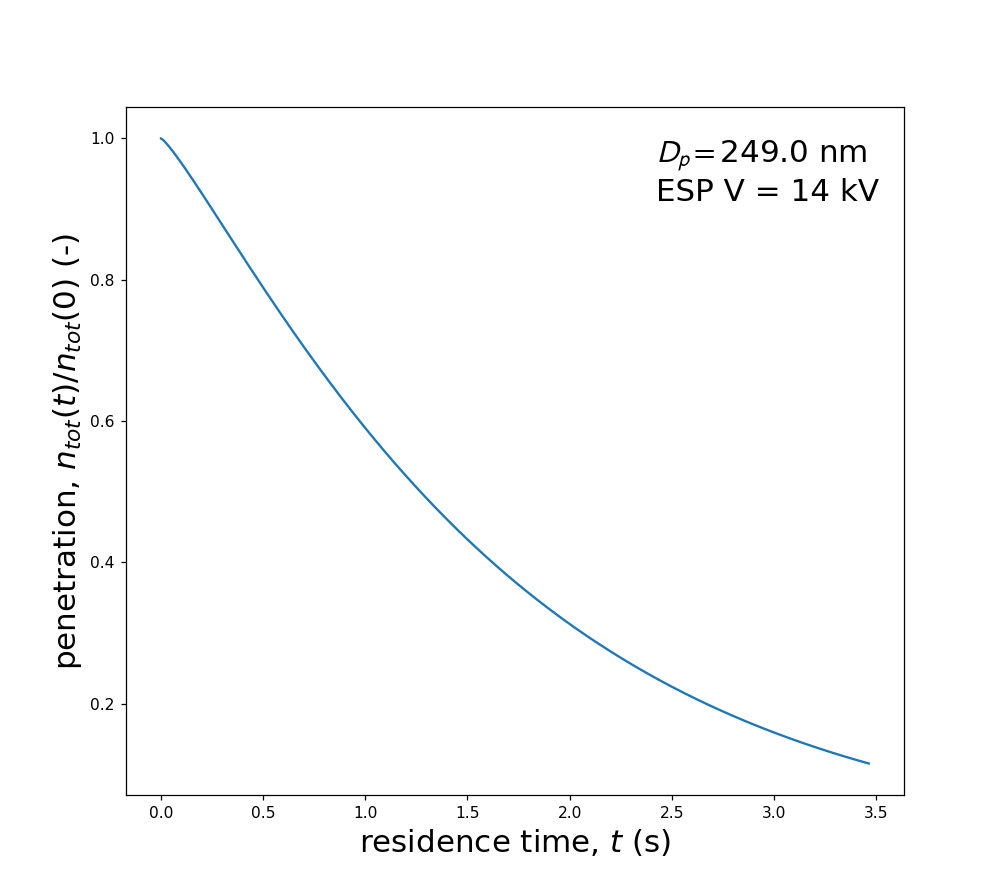

In [15]:
OneDM_Tools.Plot_in_time(particle_list_times_t,
                         parameters,
                         Rp[0],
                         column="penetration",
                         save=False)

<IPython.core.display.Javascript object>


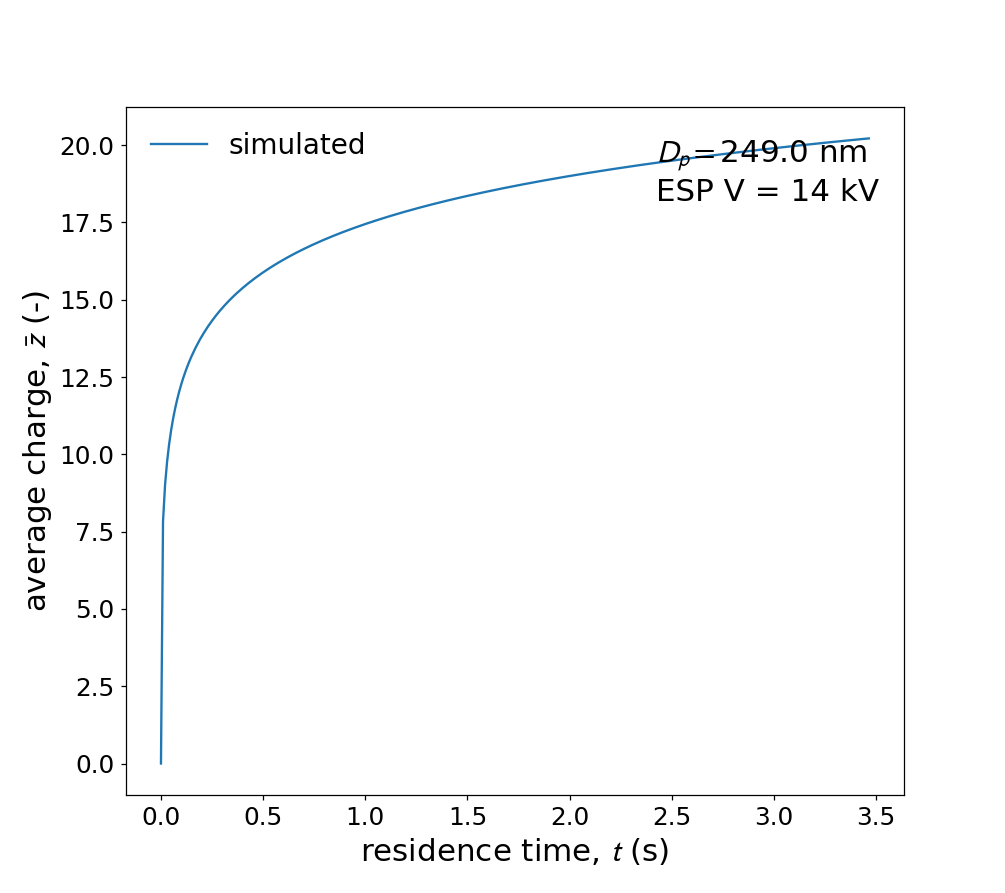

In [16]:
OneDM_Tools.Plot_in_time(particle_list_times_t,
                         parameters,
                         Rp[0],
                         column="zp_avg",
                         save=False)
plt.legend(fontsize=18, loc=0,frameon=False);
plt.show();

<IPython.core.display.Javascript object>


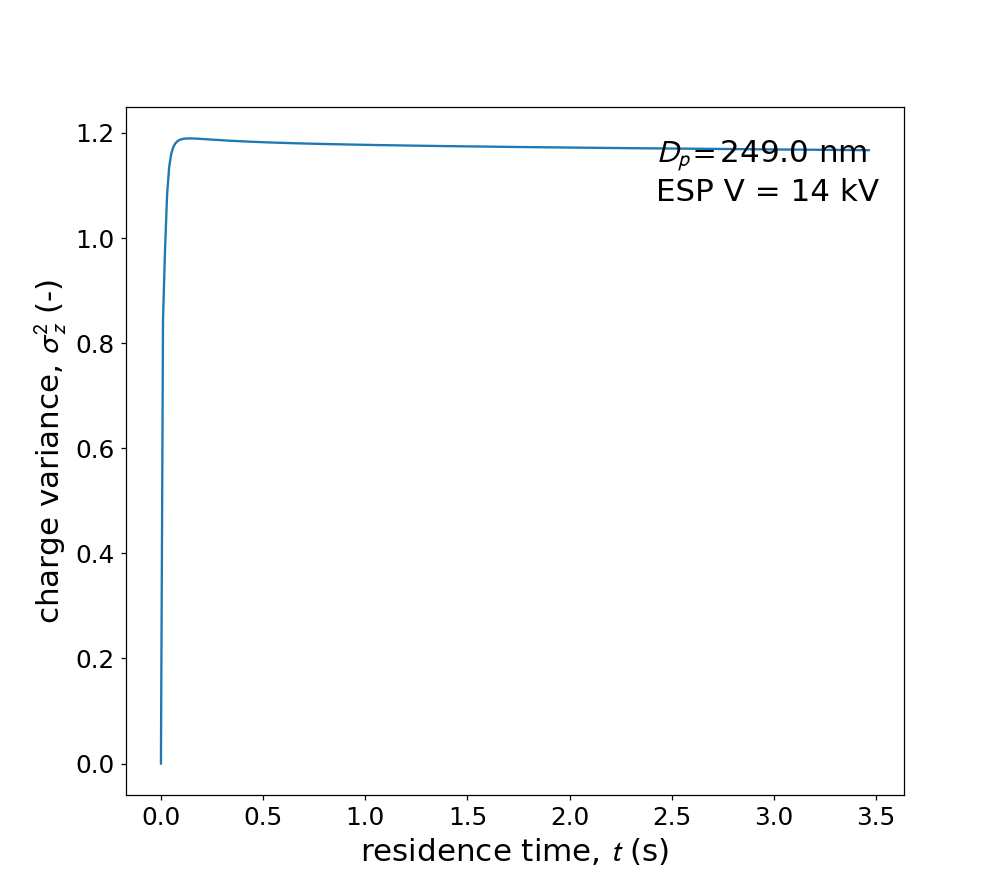

In [17]:
OneDM_Tools.Plot_in_time(particle_list_times_t,
                         parameters,
                         Rp[0],
                         column="zp_var",
                         save=False)

<IPython.core.display.Javascript object>


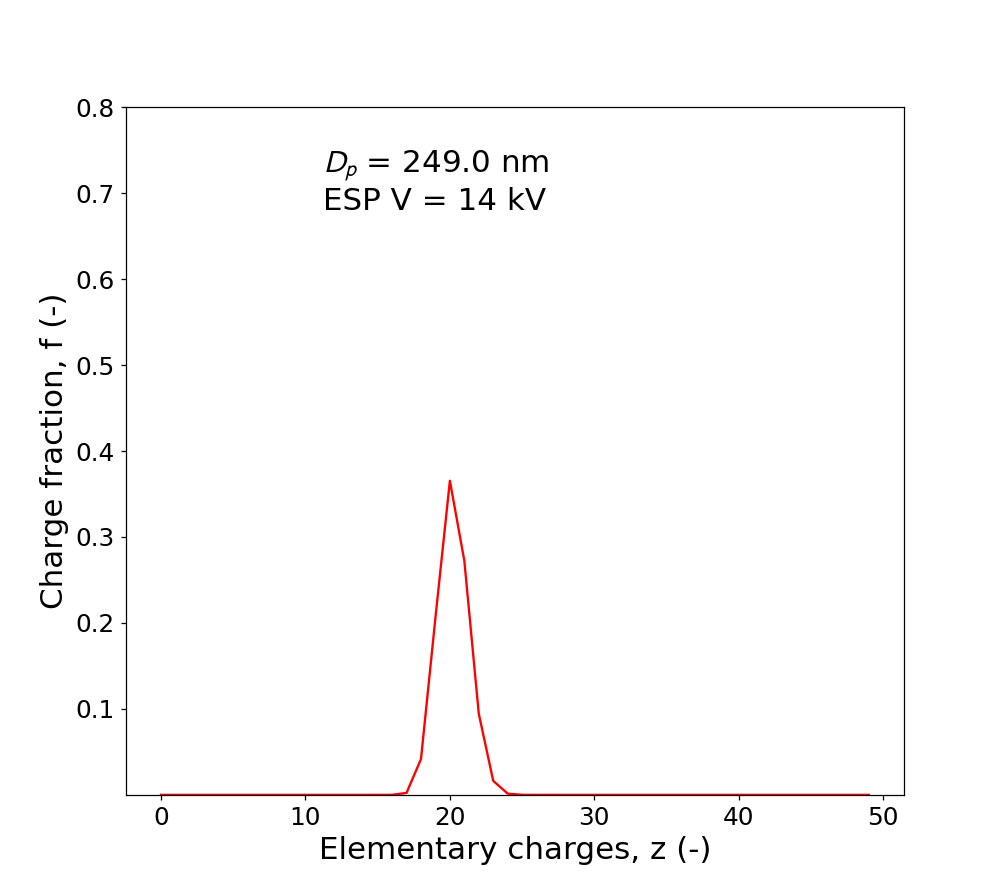

In [18]:
OneDM_Tools.Plot_distribution(particle_list_time, rp, parameters, sample=-1, save=False)
    

## Export results

In [19]:
particle_list_time["ESP_V (kV)"] = int(parameters["V"]/1000)
particle_list_time.to_csv('Simulation_results_'+\
                          str(int(parameters["V"]/1000))+\
                          '_Dp_'+str(int(2*Rp[0]*1e+09))+'.dat', index=False, sep=',')  